# Forecasting High Incomes: Leveraging US Adult Census Data for Socioeconomic Insights

## Import required libraries and load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/income.csv')

In [3]:
# preview the data
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# Statistical info of the data
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.shape

(32561, 15)

In [7]:
data.columns.to_list()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',
 'income']

In [8]:
# summarizes the key characteristics of the data
data.describe(include='all').style.background_gradient(cmap='Pastel2')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,32561.000000,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,nan,9,nan,16,nan,7,15,6,5,2,nan,nan,nan,42,2
top,nan,Private,nan,HS-grad,nan,Married-civ-spouse,Prof-specialty,Husband,White,Male,nan,nan,nan,United-States,<=50K
freq,nan,22696,nan,10501,nan,14976,4140,13193,27816,21790,nan,nan,nan,29170,24720
mean,38.581647,nan,189778.366512,nan,10.080679,nan,nan,nan,nan,nan,1077.648844,87.303830,40.437456,nan,nan
std,13.640433,nan,105549.977697,nan,2.572720,nan,nan,nan,nan,nan,7385.292085,402.960219,12.347429,nan,nan
min,17.000000,nan,12285.000000,nan,1.000000,nan,nan,nan,nan,nan,0.000000,0.000000,1.000000,nan,nan
25%,28.000000,nan,117827.000000,nan,9.000000,nan,nan,nan,nan,nan,0.000000,0.000000,40.000000,nan,nan
50%,37.000000,nan,178356.000000,nan,10.000000,nan,nan,nan,nan,nan,0.000000,0.000000,40.000000,nan,nan
75%,48.000000,nan,237051.000000,nan,12.000000,nan,nan,nan,nan,nan,0.000000,0.000000,45.000000,nan,nan


## Data Cleaning

### 1. Handling Special Characters

In [9]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [10]:
data.replace('?', np.nan, inplace=True)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### 2. Handling Missing values

In [11]:
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [12]:
data['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [13]:
data['workclass'] = data['workclass'].replace(np.nan, data['workclass'].mode()[0])

In [14]:
data.isna().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [15]:
data['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [16]:
data['occupation'] = data['occupation'].replace(np.nan, data['occupation'].mode()[0])
data.isna().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation          0
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    583
income              0
dtype: int64

In [17]:
data['native.country'].value_counts()

native.country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France       

In [18]:
data['native.country'].describe()

count             31978
unique               41
top       United-States
freq              29170
Name: native.country, dtype: object

In [19]:
data['native.country'] = data['native.country'].replace(np.nan, data['native.country'].mode()[0])
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### 3. Removing duplicates from the data

In [20]:
data.duplicated().sum()

24

In [21]:
data.drop_duplicates(inplace=True)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### 4. Handling outliers  in each column

In [22]:
data['age'].value_counts()

age
36    898
31    888
34    886
23    876
35    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

In [23]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.to_list()
print(num_cols)

['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


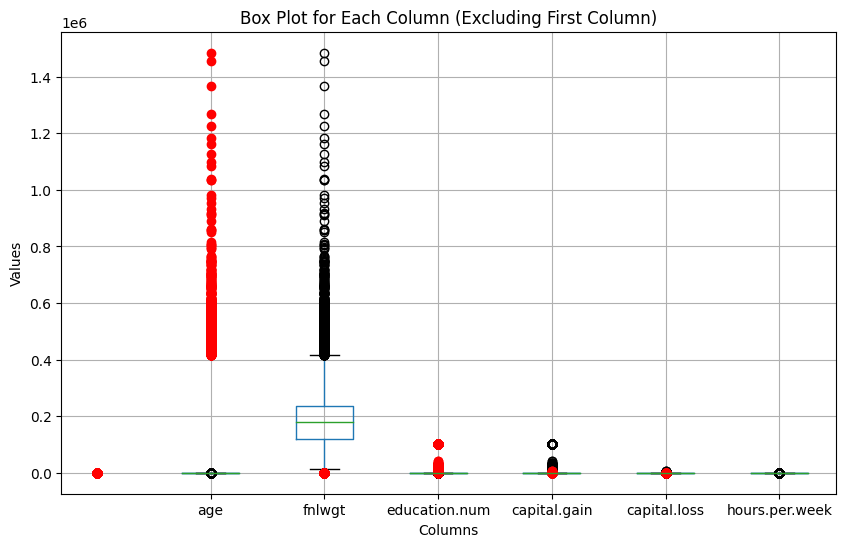

In [24]:
def plot_box_plots_with_outliers(data):

    numeric_df = data.select_dtypes(include=['int64', 'float64'])

    fig, ax = plt.subplots(figsize=(10, 6))
    numeric_df.boxplot(ax=ax)
    plt.title('Box Plot for Each Column (Excluding First Column)')
    plt.ylabel('Values')
    plt.xlabel('Columns')

    for column in numeric_df.columns:
        Q1 = numeric_df[column].quantile(0.25)
        Q3 = numeric_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = numeric_df[(numeric_df[column] < lower_bound) | (numeric_df[column] > upper_bound)][column]
        ax.plot([column] * len(outliers), outliers, 'ro')

    plt.show()

plot_box_plots_with_outliers(data)

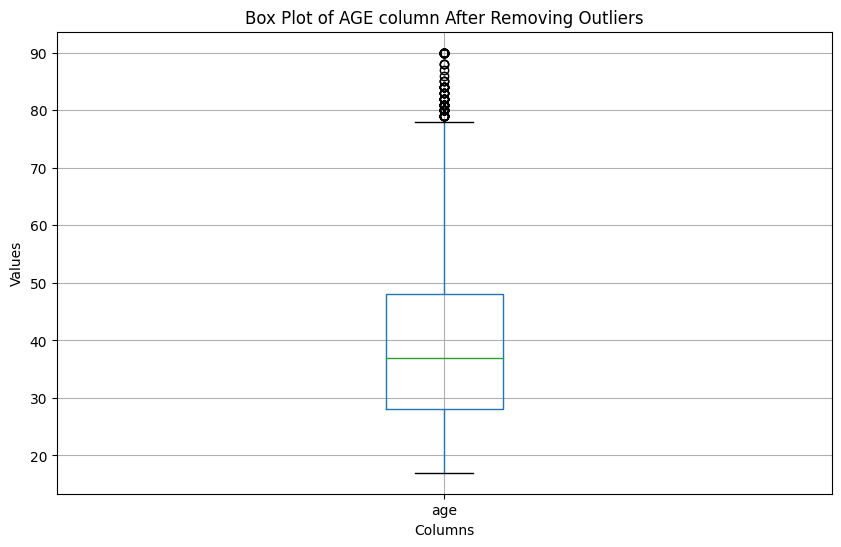

In [25]:
import matplotlib.pyplot as plt

Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from 'age' column
df = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

# Plot box plot after removing outliers
plt.figure(figsize=(10, 6))
data.boxplot(column='age')
plt.title('Box Plot of AGE column After Removing Outliers')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.show()


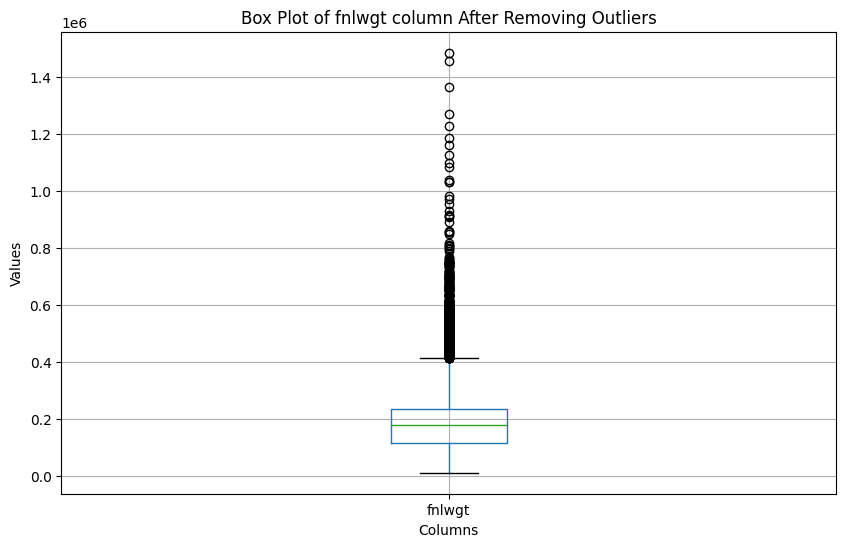

In [26]:
Q1 = data['fnlwgt'].quantile(0.25)
Q3 = data['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

# Remove outliers from 'age' column
df = data[(data['fnlwgt'] >= lower_bound) & (data['fnlwgt'] <= upper_bound)]

# Plot box plot after removing outliers
plt.figure(figsize=(10, 6))
data.boxplot(column='fnlwgt')
plt.title('Box Plot of fnlwgt column After Removing Outliers')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.show()


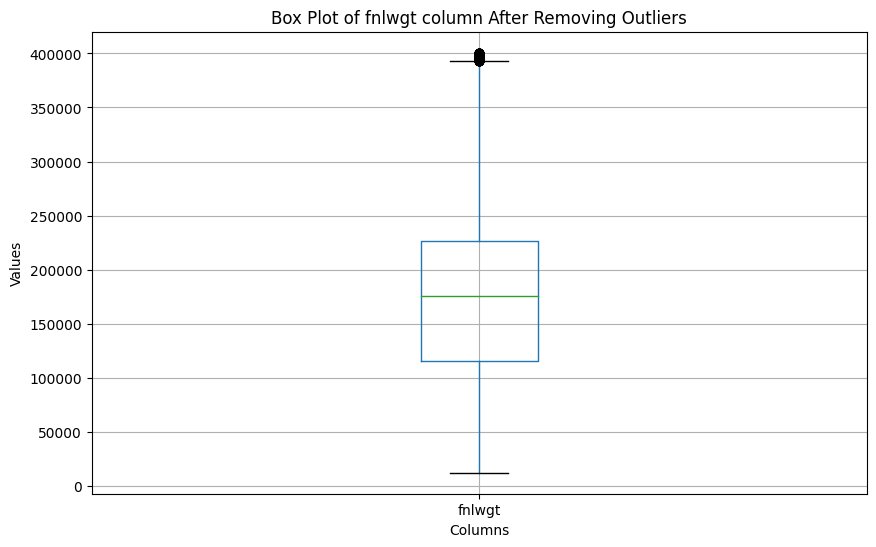

In [27]:
z_scores = (data['fnlwgt'] - data['fnlwgt'].mean()) / data['fnlwgt'].std()
threshold = 2

# Remove outliers
data = data[(np.abs(z_scores) < threshold)]

# Plot box plot after removing outliers
plt.figure(figsize=(10, 6))
data.boxplot(column='fnlwgt')
plt.title('Box Plot of fnlwgt column After Removing Outliers')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.show()

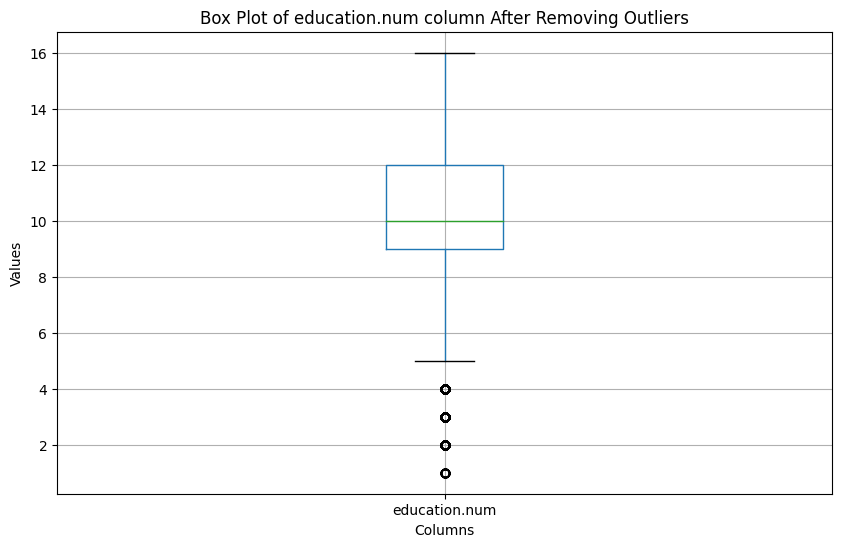

In [28]:
Q1 = data['education.num'].quantile(0.25)
Q3 = data['education.num'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from 'age' column
df = data[(data['education.num'] >= lower_bound) & (data['education.num'] <= upper_bound)]

# Plot box plot after removing outliers
plt.figure(figsize=(10, 6))
data.boxplot(column='education.num')
plt.title('Box Plot of education.num column After Removing Outliers')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.show()

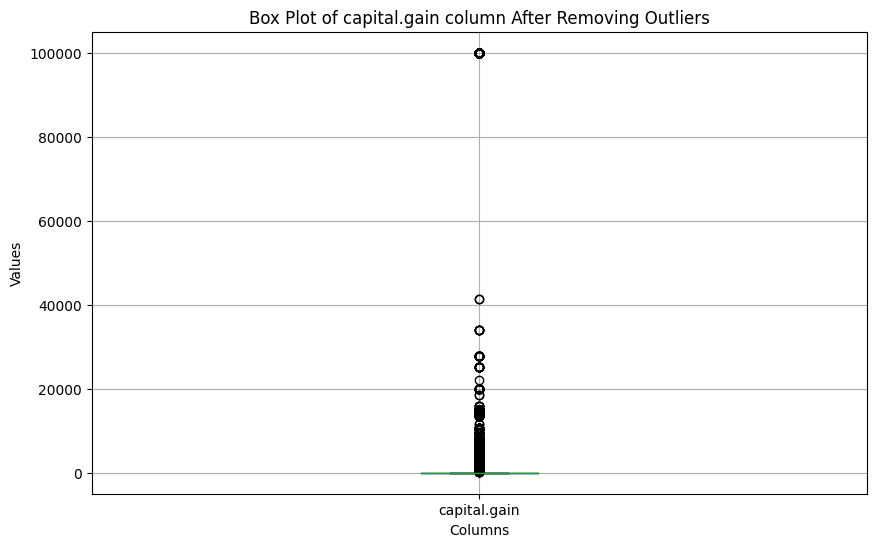

In [29]:
Q1 = data['capital.gain'].quantile(0.25)
Q3 = data['capital.gain'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.55 * IQR
upper_bound = Q3 + 0.55 * IQR

# Remove outliers from 'age' column
df = data[(data['capital.gain'] >= lower_bound) & (data['capital.gain'] <= upper_bound)]

# Plot box plot after removing outliers
plt.figure(figsize=(10, 6))
data.boxplot(column='capital.gain')
plt.title('Box Plot of capital.gain column After Removing Outliers')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.show()

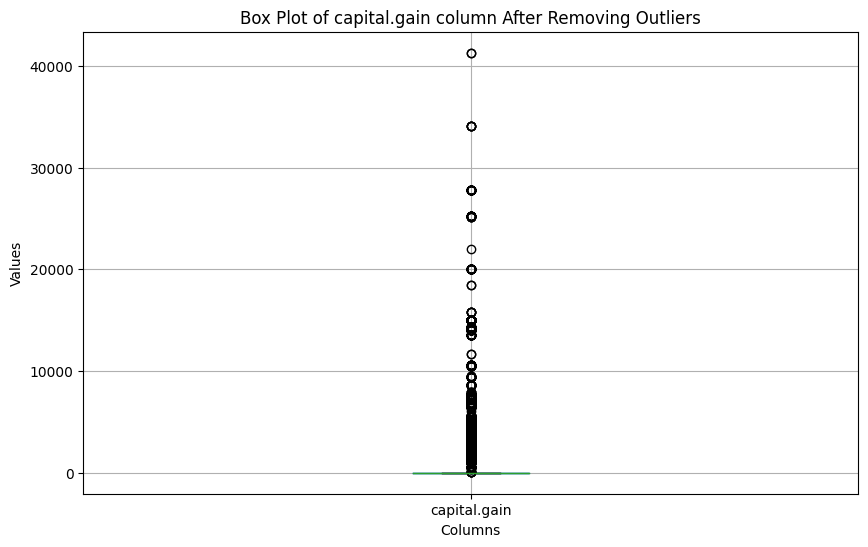

In [30]:
z_scores = (data['capital.gain'] - data['capital.gain'].mean()) / data['capital.gain'].std()
threshold = 10

# Remove outliers
data = data[(np.abs(z_scores) < threshold)]

# Plot box plot after removing outliers
plt.figure(figsize=(10, 6))
data.boxplot(column='capital.gain')
plt.title('Box Plot of capital.gain column After Removing Outliers')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.show()

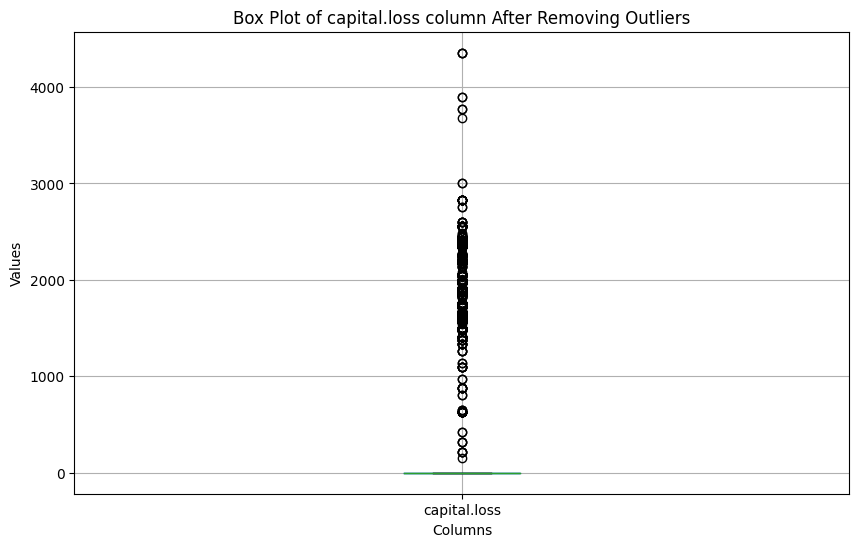

In [31]:
Q1 = data['capital.loss'].quantile(0.25)
Q3 = data['capital.loss'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.55 * IQR
upper_bound = Q3 + 0.55 * IQR

# Remove outliers from 'age' column
df = data[(data['capital.loss'] >= lower_bound) & (data['capital.loss'] <= upper_bound)]

# Plot box plot after removing outliers
plt.figure(figsize=(10, 6))
data.boxplot(column='capital.loss')
plt.title('Box Plot of capital.loss column After Removing Outliers')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.show()

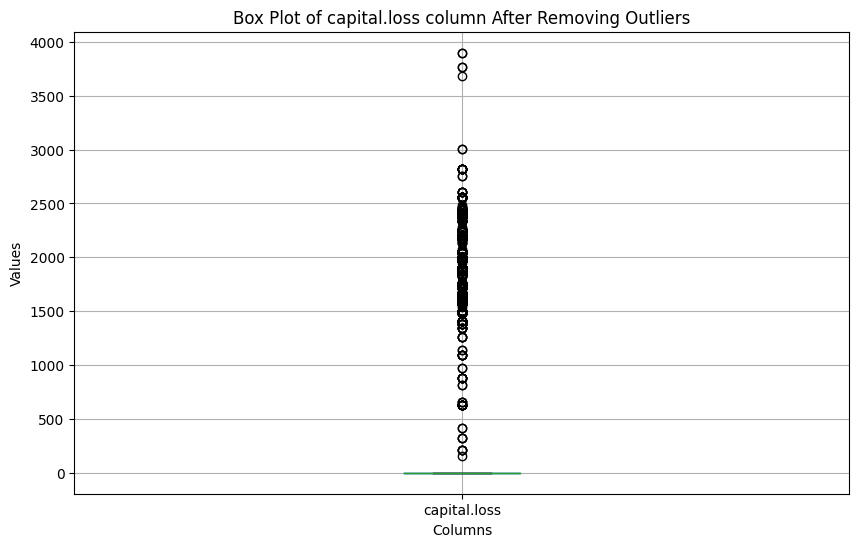

In [32]:
z_scores = (data['capital.loss'] - data['capital.loss'].mean()) / data['capital.loss'].std()
threshold = 10

# Remove outliers
data = data[(np.abs(z_scores) < threshold)]

# Plot box plot after removing outliers
plt.figure(figsize=(10, 6))
data.boxplot(column='capital.loss')
plt.title('Box Plot of capital.loss column After Removing Outliers')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.show()

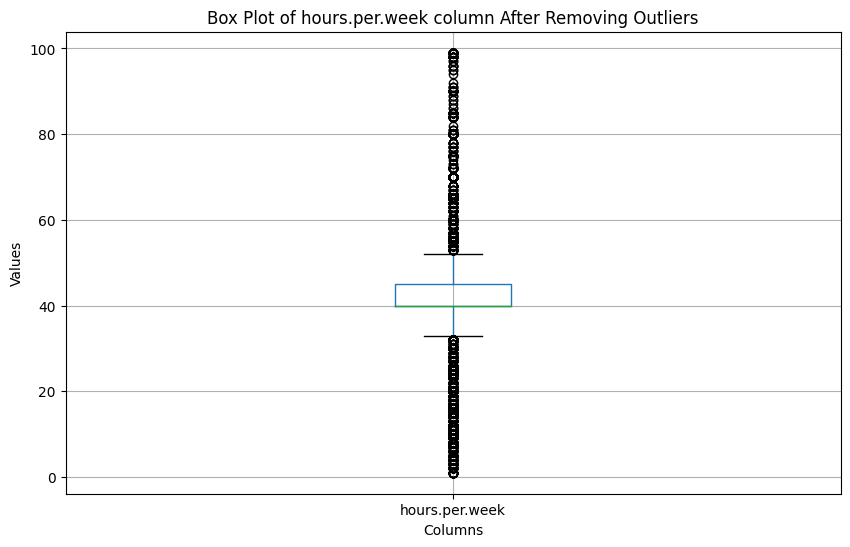

In [33]:
z_scores = (data['hours.per.week'] - data['hours.per.week'].mean()) / data['hours.per.week'].std()
threshold = 20

# Remove outliers
data = data[(np.abs(z_scores) < threshold)]

# Plot box plot after removing outliers
plt.figure(figsize=(10, 6))
data.boxplot(column='hours.per.week')
plt.title('Box Plot of hours.per.week column After Removing Outliers')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.show()

### 5. New feature

In [34]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K


In [35]:
data['income_per_hour'] = data['capital.gain'] / (data['hours.per.week'] * 52)  # assuming 52 weeks/year
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_per_hour
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0.0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0.0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,0.0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,0.0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K,0.0


In [36]:
data['income_per_hour'].describe()

count    31133.000000
mean         0.303223
std          2.301305
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        218.557692
Name: income_per_hour, dtype: float64

### 6. Categorical to numeric



In [37]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_per_hour
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0.0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0.0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,0.0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,0.0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K,0.0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31133 entries, 3 to 32560
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              31133 non-null  int64  
 1   workclass        31133 non-null  object 
 2   fnlwgt           31133 non-null  int64  
 3   education        31133 non-null  object 
 4   education.num    31133 non-null  int64  
 5   marital.status   31133 non-null  object 
 6   occupation       31133 non-null  object 
 7   relationship     31133 non-null  object 
 8   race             31133 non-null  object 
 9   sex              31133 non-null  object 
 10  capital.gain     31133 non-null  int64  
 11  capital.loss     31133 non-null  int64  
 12  hours.per.week   31133 non-null  int64  
 13  native.country   31133 non-null  object 
 14  income           31133 non-null  object 
 15  income_per_hour  31133 non-null  float64
dtypes: float64(1), int64(6), object(9)
memory usage: 4.0+ MB


In [39]:
data['race'].value_counts()

race
White                 26678
Black                  2859
Asian-Pac-Islander     1023
Amer-Indian-Eskimo      310
Other                   263
Name: count, dtype: int64

In [40]:
data['race'] = data['race'].map({'White': 0, 'Black': 1, 'Asian-Pac-Islander': 2, 'Amer-Indian-Eskimo': 3, 'Other': 4})
data['race'] = data['race'].astype('int64')

In [41]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_per_hour
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,Female,0,3900,40,United-States,<=50K,0.0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,0,Female,0,3900,40,United-States,<=50K,0.0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,0,Female,0,3770,45,United-States,<=50K,0.0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,0,Male,0,3770,40,United-States,<=50K,0.0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,0,Female,0,3683,20,United-States,>50K,0.0


In [42]:
data['sex'].value_counts()

sex
Male      20739
Female    10394
Name: count, dtype: int64

In [43]:
data['sex'] = data['sex'].map({'Male': 0, 'Female': 1})
data['sex'] = data['sex'].astype('int64')

In [44]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_per_hour
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,1,0,3900,40,United-States,<=50K,0.0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,0,1,0,3900,40,United-States,<=50K,0.0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,0,1,0,3770,45,United-States,<=50K,0.0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,0,0,0,3770,40,United-States,<=50K,0.0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,0,1,0,3683,20,United-States,>50K,0.0


In [45]:
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1})
data['income'] = data['income'].astype('int64')

### 7. Removing Unwanted columns

In [46]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_per_hour
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,1,0,3900,40,United-States,0,0.0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,0,1,0,3900,40,United-States,0,0.0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,0,1,0,3770,45,United-States,0,0.0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,0,0,0,3770,40,United-States,0,0.0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,0,1,0,3683,20,United-States,1,0.0


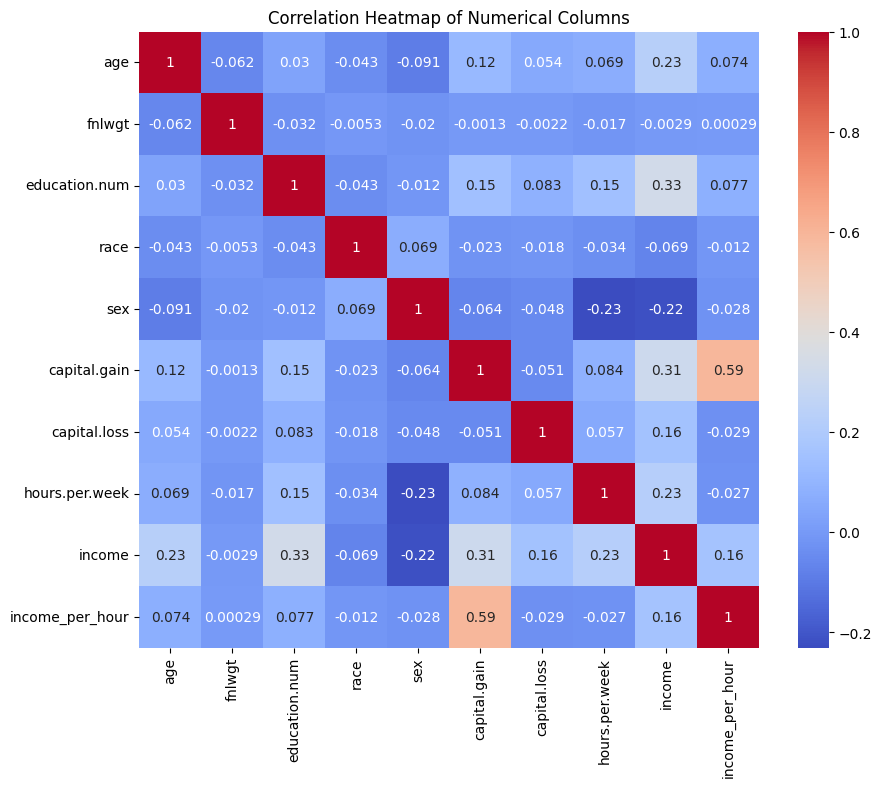

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [48]:
data.drop(['fnlwgt', 'capital.loss', 'race'], axis=1, inplace=True)

In [49]:
data.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,sex,capital.gain,hours.per.week,native.country,income,income_per_hour
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,1,0,40,United-States,0,0.0
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,1,0,40,United-States,0,0.0
5,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,1,0,45,United-States,0,0.0
6,38,Private,10th,6,Separated,Adm-clerical,Unmarried,0,0,40,United-States,0,0.0
7,74,State-gov,Doctorate,16,Never-married,Prof-specialty,Other-relative,1,0,20,United-States,1,0.0


### 8.Separating input and target columns

In [50]:
X = data.drop('income', axis=1)
y = data['income']

In [51]:
y.value_counts()

income
0    23712
1     7421
Name: count, dtype: int64

### 9. Normlization

In [52]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.to_list()
categorical_cols = data.select_dtypes(exclude=['int64', 'float64']).columns.to_list()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['age', 'education.num', 'sex', 'capital.gain', 'hours.per.week', 'income', 'income_per_hour']
Categorical columns: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'native.country']


In [53]:
data[numeric_cols].describe().loc[['min', 'max']]

,age,education.num,sex,capital.gain,hours.per.week,income,income_per_hour
min,17.0,1.0,0.0,0.0,1.0,0.0,0.000000
max,90.0,16.0,1.0,41310.0,99.0,1.0,218.557692


In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [55]:
data[numeric_cols].describe().loc[['min', 'max']]

,age,education.num,sex,capital.gain,hours.per.week,income,income_per_hour
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### 10. One-Hot Encoding

In [56]:
data[categorical_cols].isna().sum()

workclass         0
education         0
marital.status    0
occupation        0
relationship      0
native.country    0
dtype: int64

In [57]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(data[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoder.transform(data[categorical_cols]), columns=encoded_cols, index=data.index)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [58]:
data = pd.concat([data, encoded_df], axis=1)
data.drop(columns=categorical_cols, inplace=True)

In [59]:
data.head()

,age,education.num,sex,capital.gain,hours.per.week,income,income_per_hour,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
3,0.506849,0.200000,1.0,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.328767,0.600000,1.0,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.232877,0.533333,1.0,0.0,0.448980,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.287671,0.333333,0.0,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.780822,1.000000,1.0,0.0,0.193878,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## EDA

### Univariate Analysis

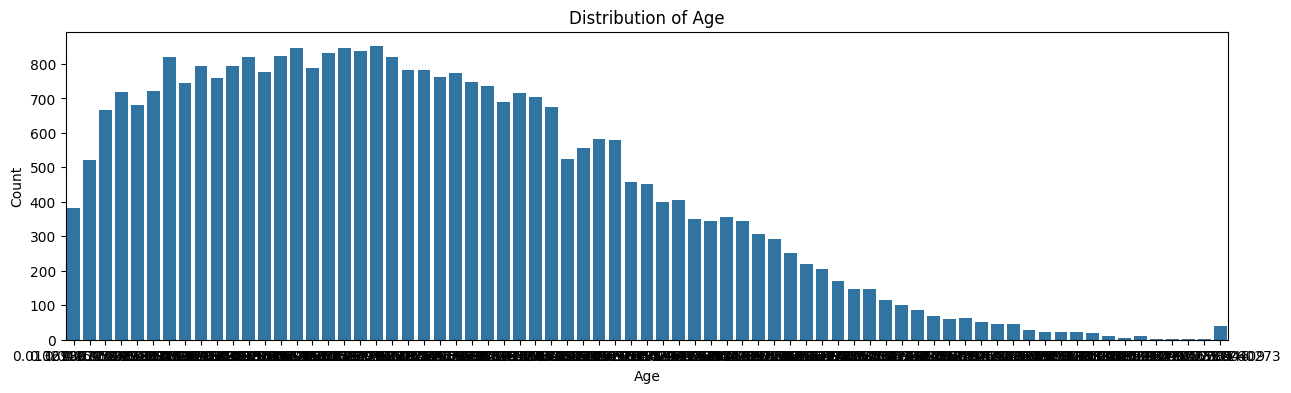

In [60]:
# Count plot of sex
plt.figure(figsize=(15, 4))
sns.countplot(x='age', data=data)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

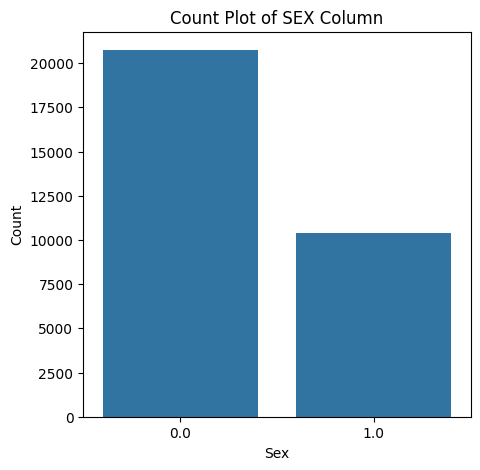

In [61]:
plt.figure(figsize=(5, 5))
sns.countplot(x='sex', data=data)
plt.title('Count Plot of SEX Column')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

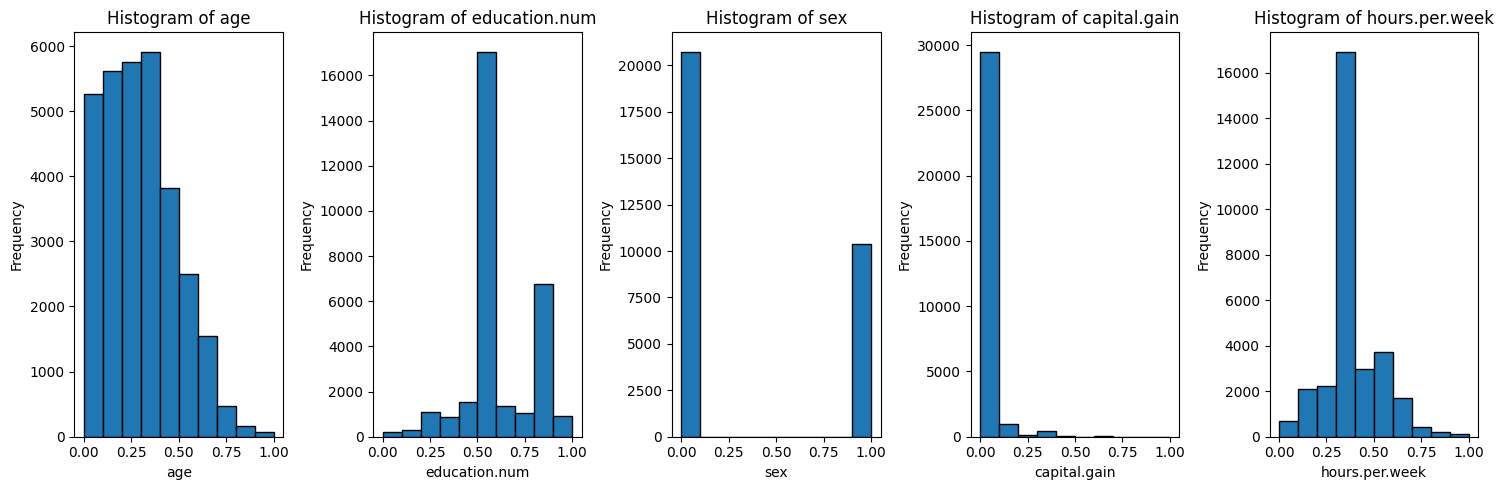

In [62]:
import matplotlib.pyplot as plt
num_cols = ['age', 'education.num', 'sex', 'capital.gain','hours.per.week']

fig, axs = plt.subplots(1, len(num_cols), figsize=(15, 5))

for i, col in enumerate(num_cols):
    axs[i].hist(data[col], bins=10, edgecolor='black')
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Bivariate Analysis

In [63]:
import plotly.express as px
df_age_hours = df.groupby('age')['hours.per.week'].mean().reset_index()
fig_line = px.line(df_age_hours, x='age', y='hours.per.week', title='Average Hours per Week by Age')
fig_line.show()

<Axes: xlabel='income', ylabel='age'>

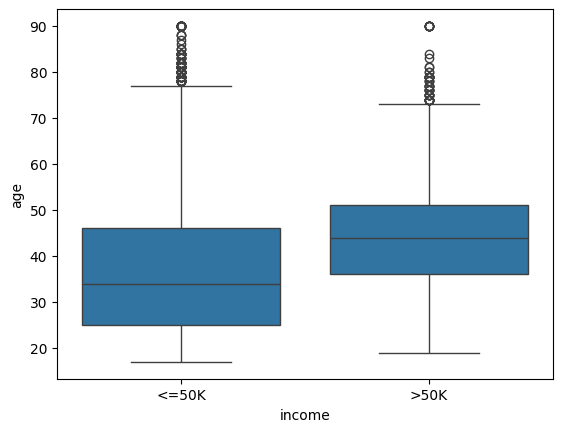

In [64]:
sns.boxplot(x='income',y='age',data=df)

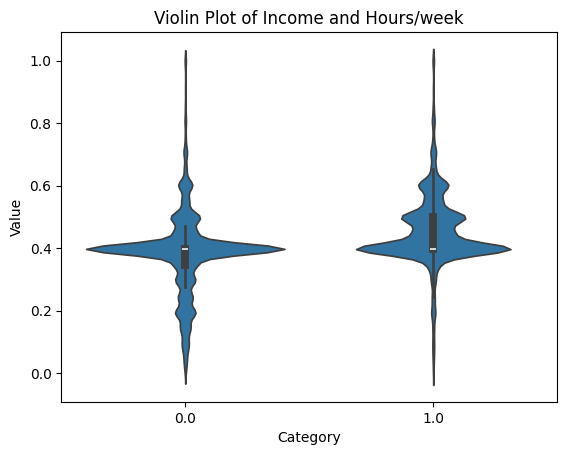

In [65]:
sns.violinplot(x='income', y='hours.per.week', data=data)
plt.title('Violin Plot of Income and Hours/week')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

### Multivariate Analysis

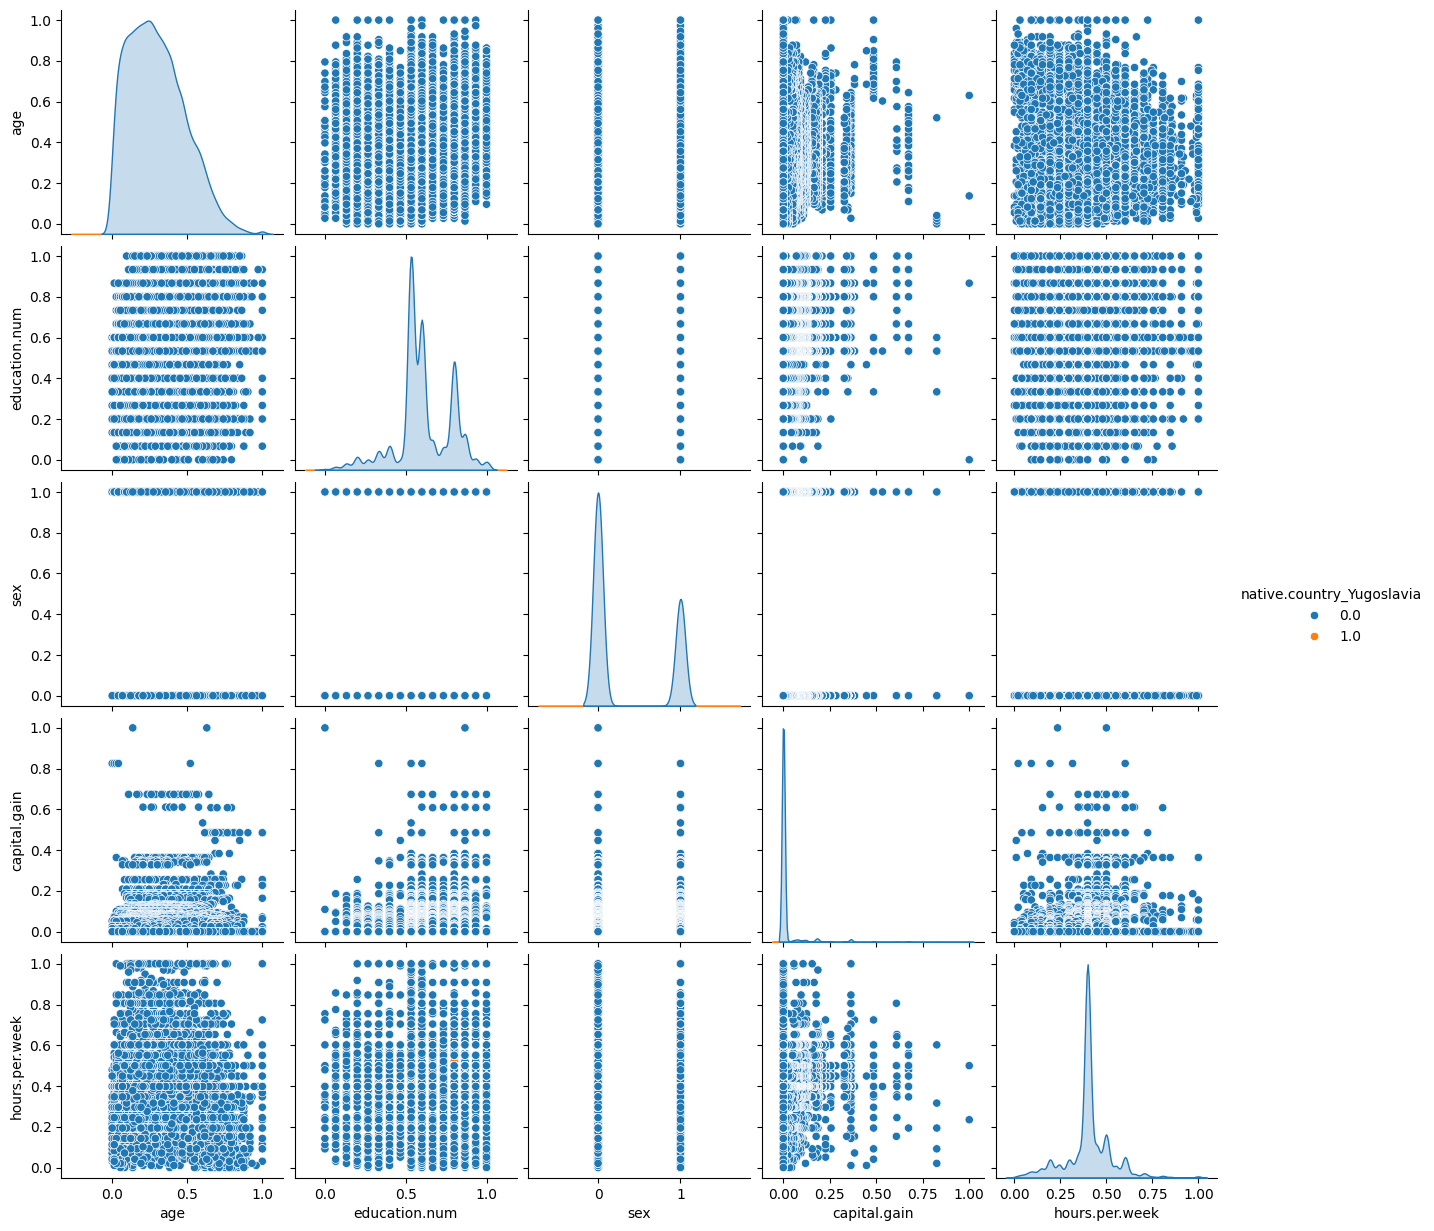

In [66]:
num_cols = ['age', 'education.num', 'sex', 'capital.gain','hours.per.week']
sns.pairplot(data, vars=data[num_cols], hue=data.columns[-1])
plt.show()

<ipython-input-67-1cbb4f28435c>:4: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



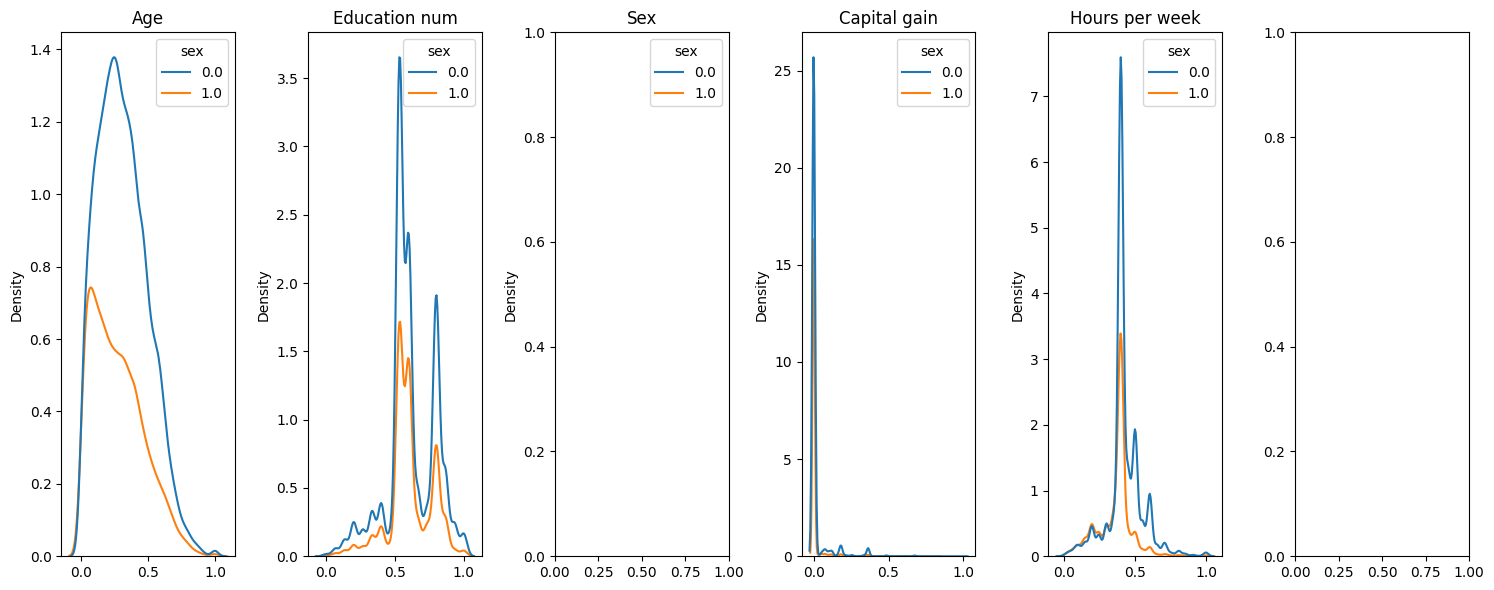

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15, 6))

for i, j in enumerate(num_cols):
    sns.kdeplot(data, x=j, hue="sex", ax=axes[i])
    axes[i].set_xlabel("")
    axes[i].set_xlabel("")
    axes[i].set_title(j.replace('.', ' ').capitalize())
plt.tight_layout()
plt.show()

## Model Building

In [68]:
data.head()

,age,education.num,sex,capital.gain,hours.per.week,income,income_per_hour,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
3,0.506849,0.200000,1.0,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.328767,0.600000,1.0,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.232877,0.533333,1.0,0.0,0.448980,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.287671,0.333333,0.0,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.780822,1.000000,1.0,0.0,0.193878,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [69]:
X = data.drop('income', axis=1)
y = data['income']

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24906, 98)
(6227, 98)
(24906,)
(6227,)


In [73]:
y_train.value_counts()

income
0.0    18945
1.0     5961
Name: count, dtype: int64

In [74]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='lbfgs'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'SVM': SVC(C=1.0, kernel='rbf', gamma='scale'),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)
}

In [75]:
res = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    res[model_name] = accuracy

In [76]:
for model_name, accuracy in res.items():
    print(f"{model_name}: {accuracy}")

Logistic Regression: 0.8500080295487393
KNN: 0.8239922916332102
Random Forest: 0.8538622129436325
SVM: 0.845993255179059
Decision Tree: 0.8528986670949092
Naive Bayes: 0.40292275574112735
XGBoost: 0.8641400353300145


### Hyperparameter tuning - XGB Classifier

In [77]:
from sklearn.model_selection import GridSearchCV
model = XGBClassifier(random_state=42)

In [78]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 8, 9],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [79]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7, 8, 9],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [80]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [81]:
print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best Accuracy: 0.8628042281262939


### Hyperparametr tuning - Decision tree classifier

In [82]:
model2 = DecisionTreeClassifier(random_state=42)

In [83]:
param_grid = {
    'max_depth': [3, 5, 7, 8, 9],
    'min_samples_split': [2, 5, 6, 8,10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

In [84]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[17:04:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 5, 6, 8, 10]},
             scoring='accuracy')

In [85]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [86]:
print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.8613989442498917


### Hyperparameter tuning - Random Forest Classifier

In [87]:
model3 = RandomForestClassifier(random_state=42)

In [88]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

In [89]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[17:42:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 5, 6, 8, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [90]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [91]:
print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Accuracy: 0.8632861316197052


## Model after hyperparamter tuning

In [92]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=300, max_depth=3,min_samples_leaf=1,min_samples_split=2, random_state=42),#
    'SVM': SVC(C=1.0, kernel='rbf', gamma='scale'),
    'Decision Tree': DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.1, random_state=42)
}

In [93]:
result = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    result[model_name] = accuracy

In [94]:
for model_name, accuracy in result.items():
    print(f"{model_name}: {accuracy}")

Logistic Regression: 0.8500080295487393
KNN: 0.8239922916332102
Random Forest: 0.7973341898185322
SVM: 0.845993255179059
Decision Tree: 0.8451903003051229
Naive Bayes: 0.40292275574112735
XGBoost: 0.8670306728761844


## EDA of model's performance

### 1. Logistic Regression

0.8999119948504415


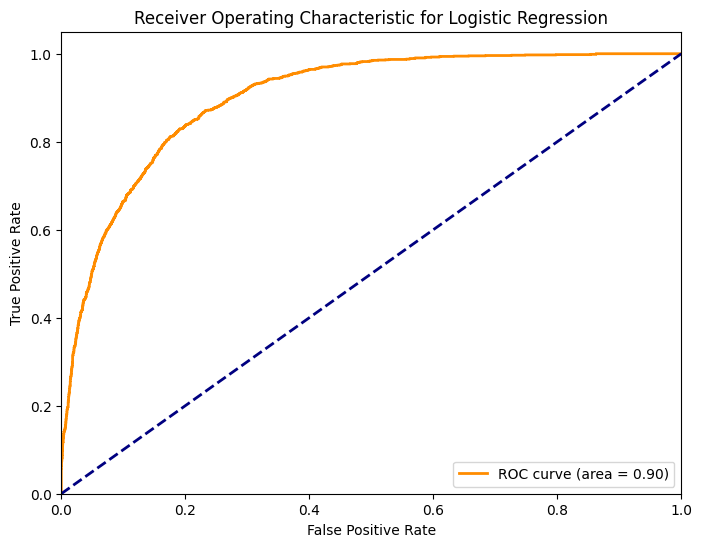

In [95]:
# 1. Logistic Regression

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

# ROC Curve for Logistic Regression
y_pred_prob = models['Logistic Regression'].predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

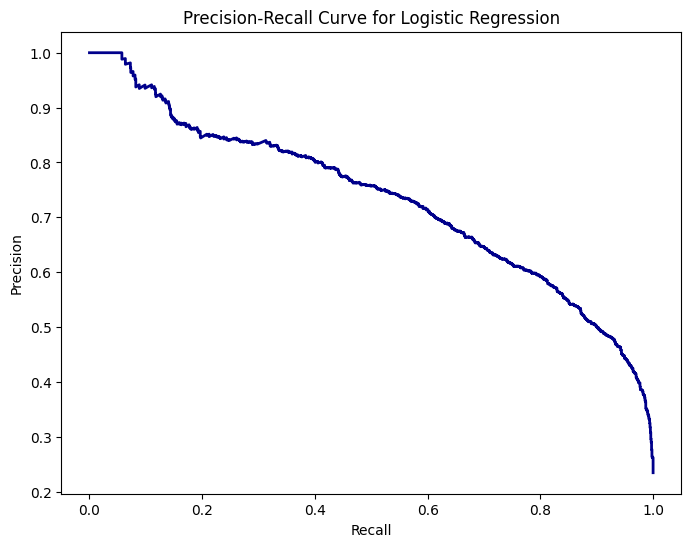

In [96]:
# precision recall curve
from sklearn.metrics import precision_recall_curve

y_pred_prob = models['Logistic Regression'].predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkblue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

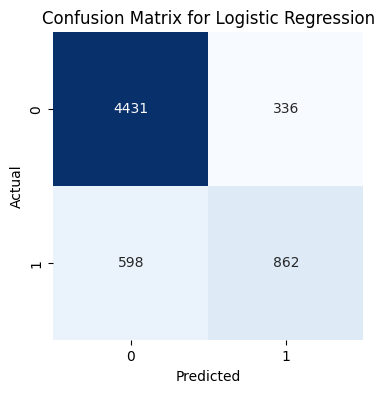

In [97]:
from sklearn.metrics import confusion_matrix

y_pred = models['Logistic Regression'].predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')

In [98]:
# Classification report for logistic regression

from sklearn.metrics import classification_report

y_pred = models['Logistic Regression'].predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      4767
         1.0       0.72      0.59      0.65      1460

    accuracy                           0.85      6227
   macro avg       0.80      0.76      0.78      6227
weighted avg       0.84      0.85      0.84      6227



### 2. Kneighbours Classifier

0.8385505659629128


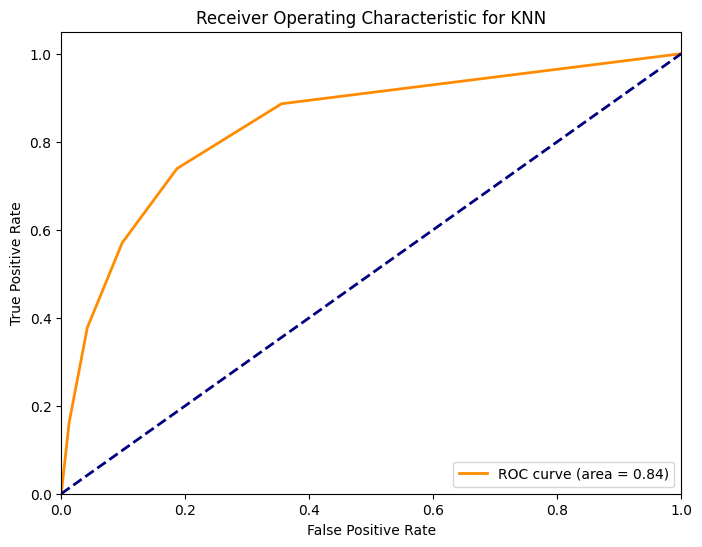

In [99]:
y_pred_prob = models['KNN'].predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(roc_auc)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for KNN')
plt.legend(loc='lower right')
plt.show()

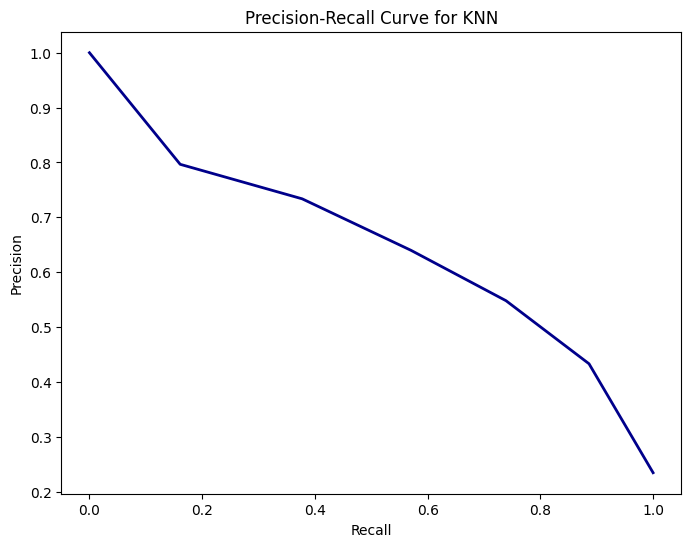

In [100]:
# precision recall curve
from sklearn.metrics import precision_recall_curve

y_pred_prob = models['KNN'].predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkblue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for KNN')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix for KNN')

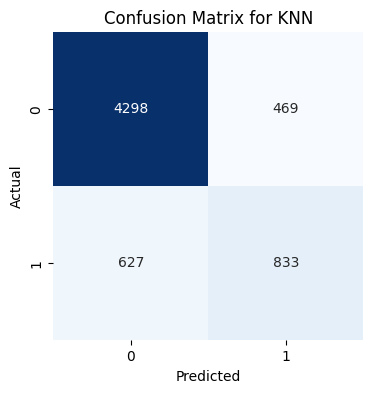

In [101]:
y_pred = models['KNN'].predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')

In [102]:
y_pred = models['KNN'].predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89      4767
         1.0       0.64      0.57      0.60      1460

    accuracy                           0.82      6227
   macro avg       0.76      0.74      0.75      6227
weighted avg       0.82      0.82      0.82      6227



### 3. Random Forest Classifier

0.8878159923676188


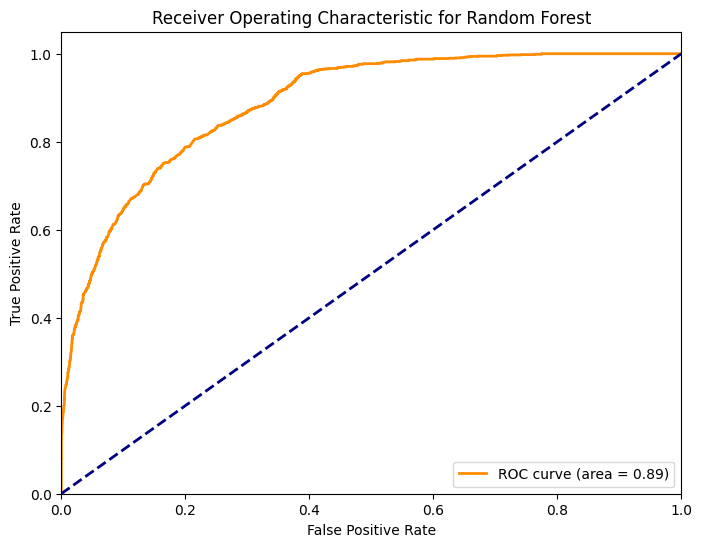

In [103]:
y_pred_prob = models['Random Forest'].predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(roc_auc)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest')
plt.legend(loc='lower right')
plt.show()

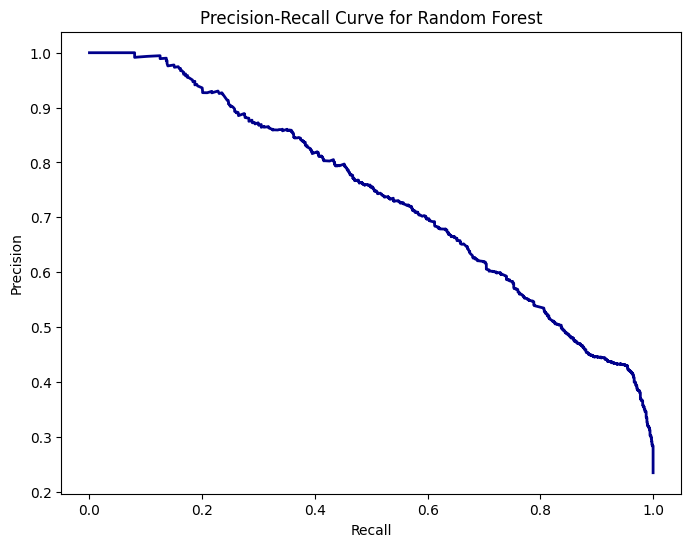

In [104]:
y_pred_prob = models['Random Forest'].predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkblue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

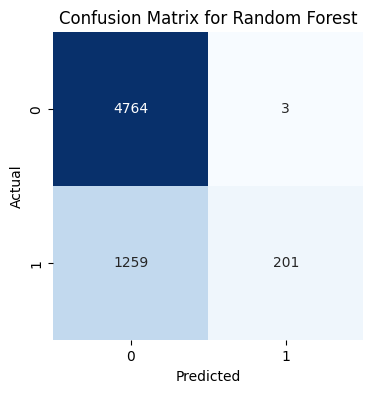

In [123]:
y_pred = models['Random Forest'].predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')

In [106]:
y_pred = models['Random Forest'].predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88      4767
         1.0       0.99      0.14      0.24      1460

    accuracy                           0.80      6227
   macro avg       0.89      0.57      0.56      6227
weighted avg       0.84      0.80      0.73      6227



### 4. SVM Classifier

0.8899766804313904


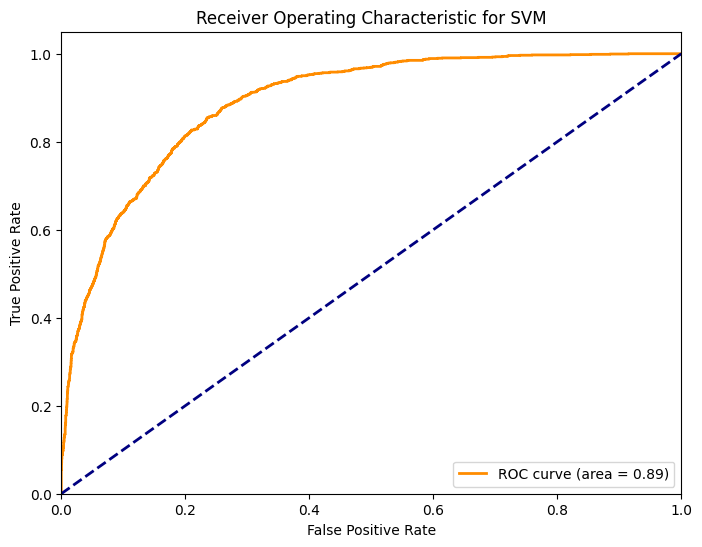

In [107]:
y_pred_decision = models['SVM'].decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_decision)
roc_auc = auc(fpr, tpr)
print(roc_auc)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM')
plt.legend(loc='lower right')
plt.show()

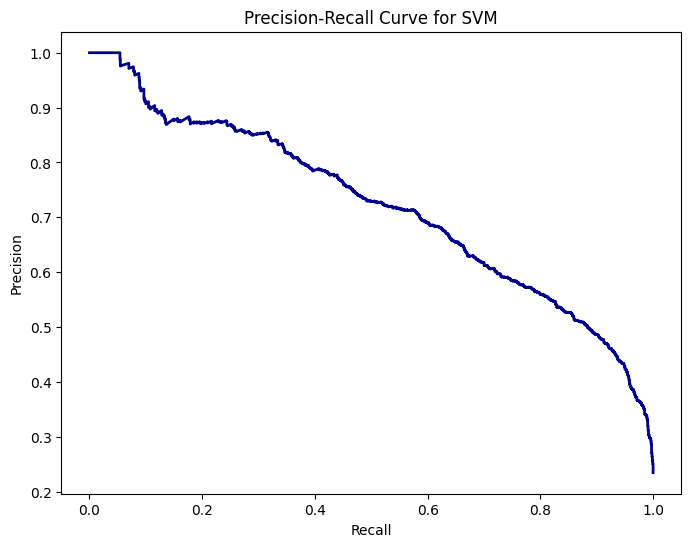

In [108]:
y_pred_prob = models['SVM'].decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkblue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix for SVM')

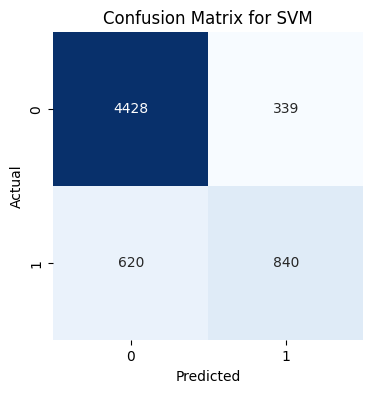

In [109]:
from sklearn.metrics import confusion_matrix

y_pred = models['SVM'].predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')

In [110]:
y_pred = models['SVM'].predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      4767
         1.0       0.71      0.58      0.64      1460

    accuracy                           0.85      6227
   macro avg       0.79      0.75      0.77      6227
weighted avg       0.84      0.85      0.84      6227



### 5. Decision Tree Classifier

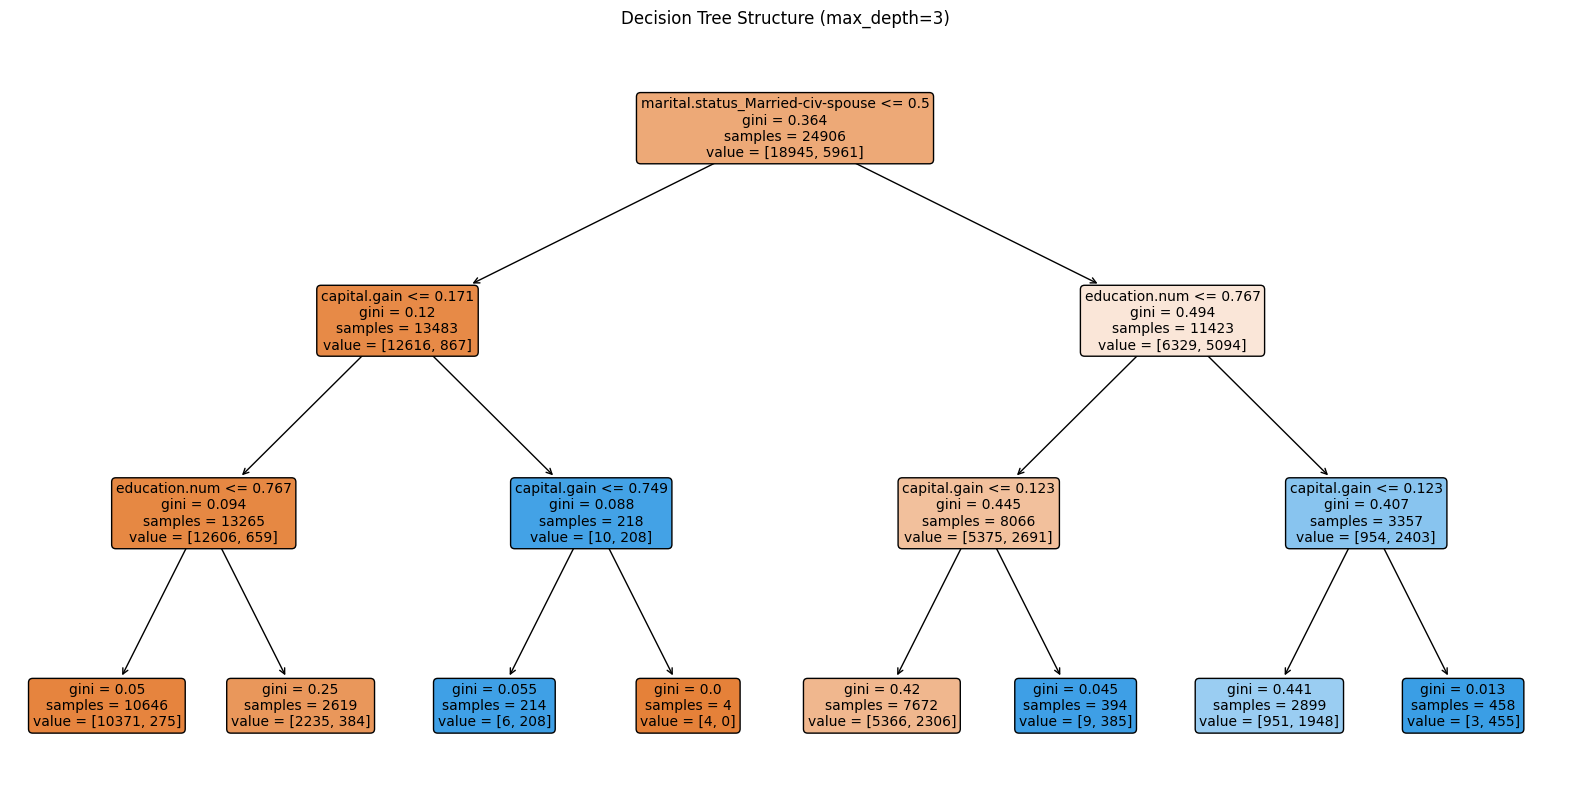

In [111]:
from sklearn.tree import plot_tree

# Limit the depth of the tree for visualization purposes
max_depth_to_display = 3

# Plot the decision tree with limited depth
plt.figure(figsize=(20, 10))
plot_tree(models['Decision Tree'], feature_names=X.columns, filled=True, rounded=True, fontsize=10, max_depth=max_depth_to_display)
plt.title(f'Decision Tree Structure (max_depth={max_depth_to_display})')
plt.show()

0.8588694104157867


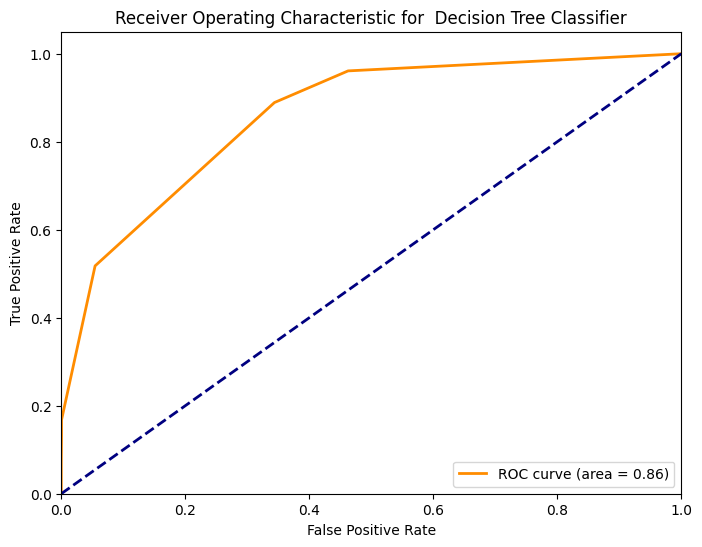

In [112]:
# Roc curve for DTC model

from sklearn.metrics import roc_curve, auc

y_pred_prob = models['Decision Tree'].predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(roc_auc)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for  Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()


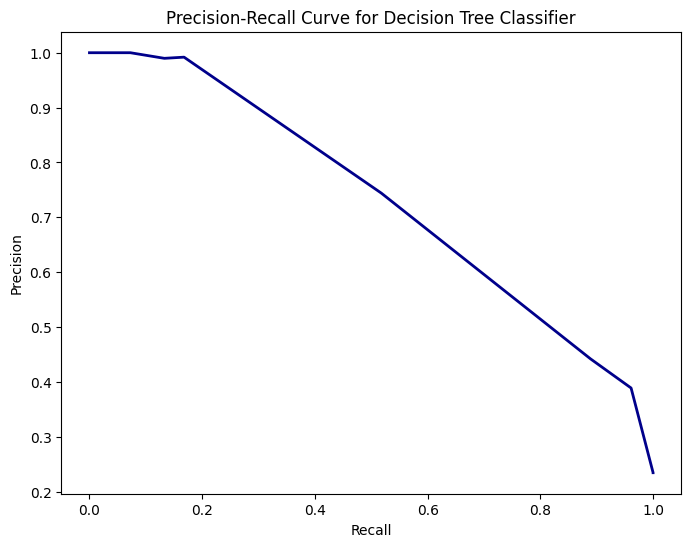

In [113]:
# Precision recall curve for DTC
y_pred_prob = models['Decision Tree'].predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkblue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree Classifier')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

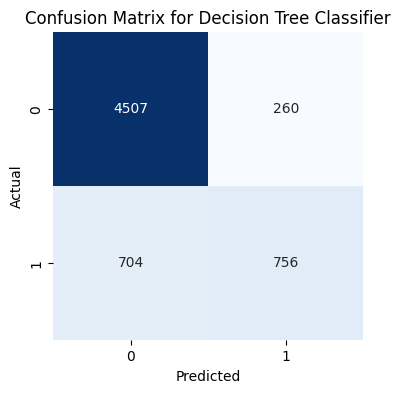

In [114]:
# Confusion matrix
y_pred = models['Decision Tree'].predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')

In [124]:
y_pred = models['Decision Tree'].predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      4767
         1.0       0.74      0.52      0.61      1460

    accuracy                           0.85      6227
   macro avg       0.80      0.73      0.76      6227
weighted avg       0.84      0.85      0.83      6227



### 6. Naive Bayes Classifier

0.6864054673827772


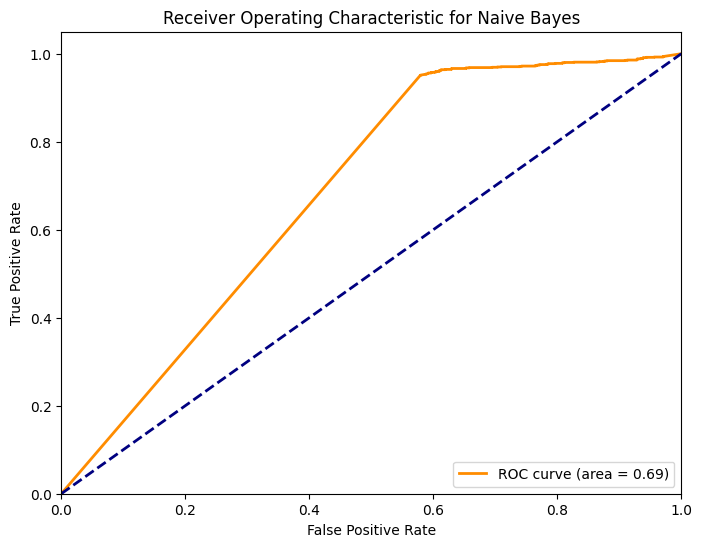

In [115]:
y_pred_prob = models['Naive Bayes'].predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(roc_auc)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Naive Bayes')
plt.legend(loc='lower right')
plt.show()

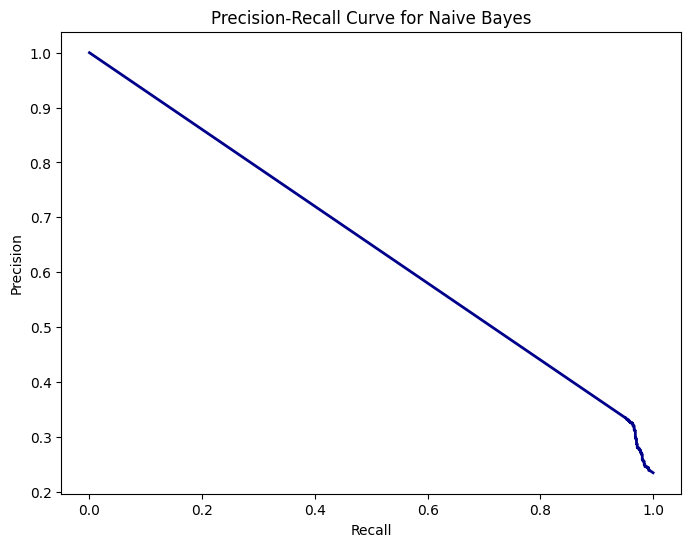

In [116]:
y_pred_prob = models['Naive Bayes'].predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkblue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Naive Bayes')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes')

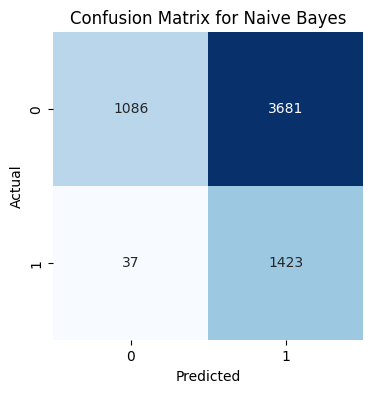

In [117]:
y_pred = models['Naive Bayes'].predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')

In [118]:
y_pred = models['Naive Bayes'].predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.97      0.23      0.37      4767
         1.0       0.28      0.97      0.43      1460

    accuracy                           0.40      6227
   macro avg       0.62      0.60      0.40      6227
weighted avg       0.81      0.40      0.38      6227



### 7. XGBoost Classifier

0.9189947441169456


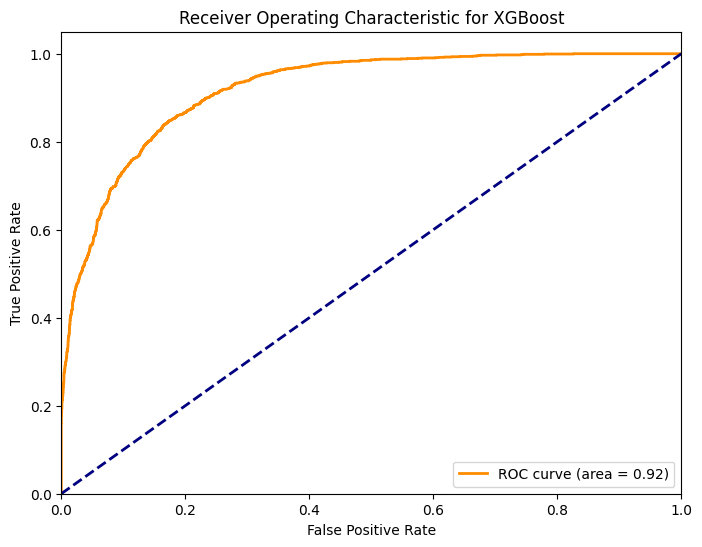

In [119]:
y_pred_prob = models['XGBoost'].predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(roc_auc)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for XGBoost')
plt.legend(loc='lower right')
plt.show()

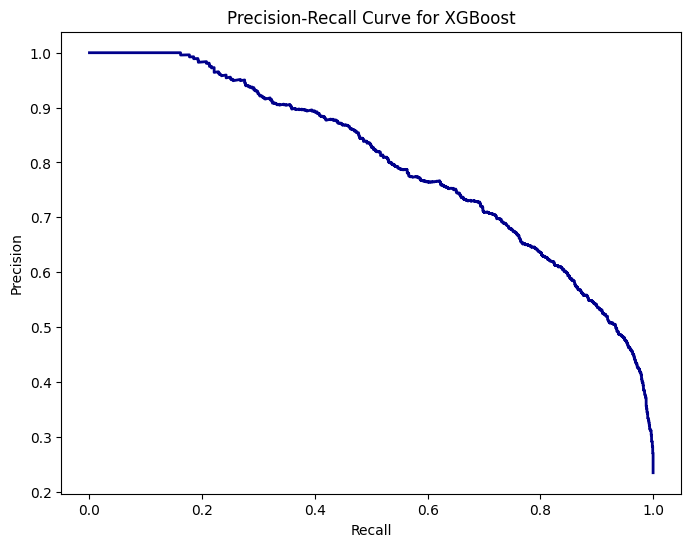

In [120]:
y_pred_prob = models['XGBoost'].predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkblue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGBoost')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix for XGBoost')

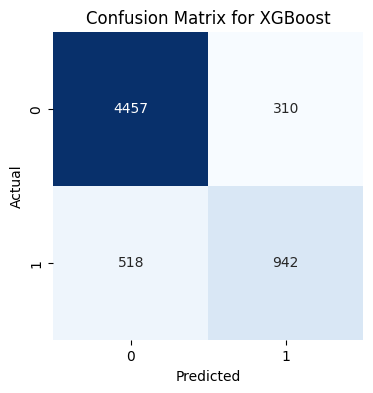

In [121]:
from sklearn.metrics import confusion_matrix

y_pred = models['XGBoost'].predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')

In [122]:
# Classification report for logistic regression

from sklearn.metrics import classification_report

y_pred = models['XGBoost'].predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92      4767
         1.0       0.75      0.65      0.69      1460

    accuracy                           0.87      6227
   macro avg       0.82      0.79      0.80      6227
weighted avg       0.86      0.87      0.86      6227

